# 回帰のための人工データを作成
- [有名なテストfunction](https://www.sfu.ca/~ssurjano/optimization.html)
    - [BRANIN FUNCTION](https://www.sfu.ca/~ssurjano/branin.html)
- 作成したデータは 'dump/data_df.pkl'に保存される

In [1]:
from IPython.core.display import display, Math, Latex

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.animation as animation


import numpy as np
from numpy.random import seed
import pandas as pd
from  sympy import *
from sympy.plotting import plot, plot3d
init_printing()
%matplotlib notebook
%matplotlib inline

## ブラックボックス関数にノイズを加えるチュートリアル
- $y = sin(x) + \epsilon, \epsilon$ ~ $N(0, 0.15) $

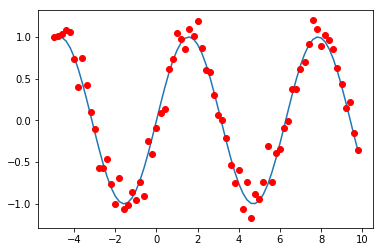

In [2]:
_X = np.arange(-5, 10, 0.2)
true_values = np.array([np.sin(_x) for _x in _X])
plt.plot(_X, true_values)
noise = np.random.normal(0.0, 0.15, len(_X))
y = true_values + noise
plt.plot(_X, y, 'ro')

## Branin function
$f(x1, x2) = a(x2 - b*x2^2 + c*x1 - r)^2 + s*(1-t)*cos(x1) + s$

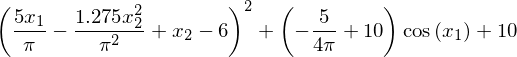

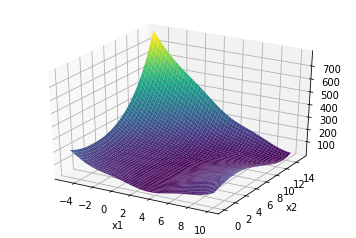

In [3]:
x1, x2, x3 = symbols('x1:%d' % (3+1))

a = 1
b = 5.1 / (4*(pi**2))
c = 5 / pi
r = 6
s = 10
t = 1 / (8*pi)

f_expr =  a*(x2 - b*x2**2 + c*x1 - r)**2 + s*(1-t)*cos(x1) + s
f = lambdify((x1, x2), f_expr, "numpy")
display(f_expr)

plot3d(f_expr, (x1, -5, 10), (x2, 0, 15), xlabel='x1', ylabel='x2')

In [4]:
seed(2345)
sample_num = 100

_x1 = np.random.uniform(-5, 10, size=sample_num)
_x2 = np.random.uniform(0, 15, size=sample_num)
_X = np.array([_x1, _x2]).T

true_values = np.array([f(*_x) for _x in _X])
noise = np.random.normal(loc=0.0, scale=0.15, size=len(true_values))
y = true_values + noise

df = pd.DataFrame(list(zip(_X, y)))
df.columns = ['X', 'y']
df.to_pickle('dump/data_df.pkl')

In [5]:
df = pd.read_pickle('dump/data_df.pkl')
df[:2]

,X,y
0,"[4.90966463835, 0.00116373935737]",15.183890
1,"[1.20400978032, 7.70527110964]",30.055251
